In [4]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
all_df = pd.concat([train_df,test_df], sort=False).reset_index(drop=True)

In [5]:
all_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<AxesSubplot:>

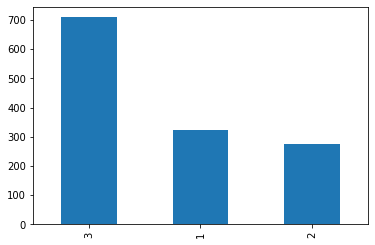

In [7]:
all_df.Pclass.value_counts().plot.bar()

In [11]:
all_df[["Pclass","Fare"]].groupby("Pclass").describe()

Fare                                                                 
        count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

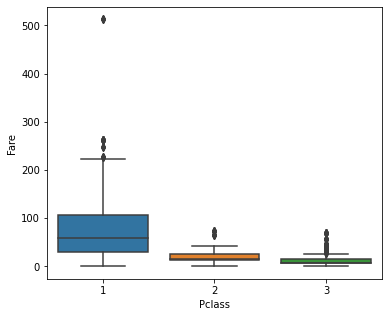

In [15]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass", y="Fare", data=all_df)

### 1등급 티켓 중 고액권(1등급 티켓 상위 25%)을 Pclass0으로 만들기

In [16]:
all_df["Pclass2"] = all_df["Pclass"]

In [17]:
all_df.loc[all_df["Fare"]>108, "Pclass2"] = 0

In [18]:
all_df[all_df["Pclass2"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1263,NaN,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,0
1266,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,0
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,0
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0


In [19]:
all_df[["Pclass2","Age"]].groupby("Pclass2").describe()

Age                                                     
         count       mean        std   min   25%   50%    75%   max
Pclass2                                                            
0         76.0  35.242368  15.422162  0.92  24.0  35.0  45.50  67.0
1        208.0  40.591346  13.981486  4.00  30.0  40.5  50.25  80.0
2        261.0  29.506705  13.638627  0.67  22.0  29.0  36.00  70.0
3        501.0  24.816367  11.958202  0.17  18.0  24.0  32.00  74.0

<AxesSubplot:xlabel='Pclass2', ylabel='Age'>

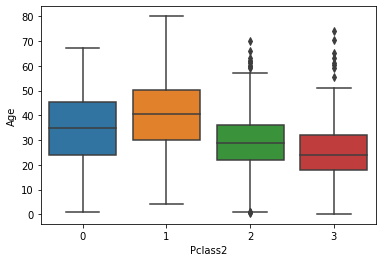

In [20]:
sns.boxplot(x="Pclass2", y="Age", data=all_df)

In [21]:
all_df[all_df["Age"]>15][["Pclass","Age"]].groupby("Pclass").describe()

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Pclass                                                           
1       276.0  40.056159  13.724680  16.0  29.0  39.0  50.0  80.0
2       233.0  32.369099  11.363367  16.0  24.0  30.0  39.0  70.0
3       422.0  28.200237   9.634512  16.0  21.0  26.0  33.0  74.0

<AxesSubplot:xlabel='Pclass2', ylabel='Age'>

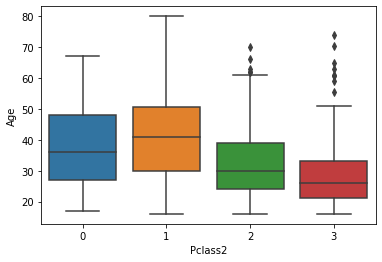

In [24]:
# plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass2", y="Age", data=all_df[all_df["Age"]>15])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

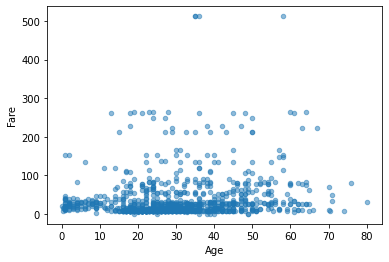

In [26]:
all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)

In [27]:
all_df["family_num"] = all_df["SibSp"] + all_df["Parch"]

In [35]:
all_df[["Pclass2","family_num"]].groupby("Pclass2").describe()

family_num                                              
             count      mean       std  min  25%  50%  75%   max
Pclass2                                                         
0             81.0  1.543210  1.541504  0.0  0.0  1.0  2.0   5.0
1            242.0  0.553719  0.687172  0.0  0.0  0.0  1.0   3.0
2            277.0  0.761733  1.029060  0.0  0.0  0.0  1.0   5.0
3            709.0  0.968970  1.921230  0.0  0.0  0.0  1.0  10.0

<AxesSubplot:xlabel='Pclass2', ylabel='family_num'>

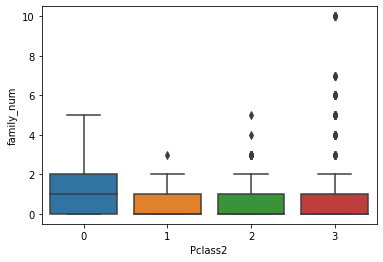

In [36]:
sns.boxplot(x="Pclass2", y="family_num", data=all_df)

In [48]:
Pclass_gender_df = all_df[["Pclass2","Sex","PassengerId"]].dropna().groupby(["Pclass2","Sex"]).count().unstack()


<AxesSubplot:xlabel='Pclass2'>

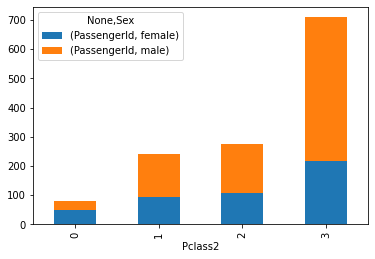

In [44]:
Pclass_gender_df.plot.bar(stacked=True)

In [59]:
Pclass_gender_df["male_ratio"] = Pclass_gender_df["PassengerId","male"] / (Pclass_gender_df["PassengerId","male"] + Pclass_gender_df["PassengerId","female"])

In [60]:
Pclass_gender_df

PassengerId      male_ratio
Sex          female male           
Pclass2                            
0                51   30   0.370370
1                93  149   0.615702
2               106  171   0.617329
3               216  493   0.695346

In [61]:
Pclass_emb_df = all_df[["Pclass2","Embarked","PassengerId"]].dropna().groupby(["Pclass2","Embarked"]).count().unstack()

In [63]:
Pclass_emb_df = Pclass_emb_df.fillna(0)

In [64]:
Pclass_emb_df

PassengerId              
Embarked           C      Q      S
Pclass2                           
0               47.0    0.0   34.0
1               94.0    3.0  143.0
2               28.0    7.0  242.0
3              101.0  113.0  495.0

<AxesSubplot:xlabel='Pclass2'>

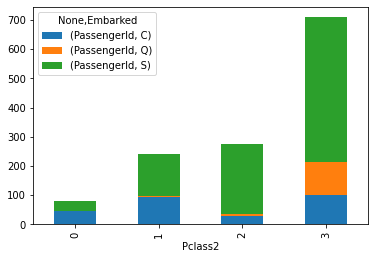

In [65]:
Pclass_emb_df.plot.bar(stacked=True)

In [68]:
Pclass_emb_df_ratio = Pclass_emb_df.copy()
Pclass_emb_df_ratio["sum"] = Pclass_emb_df_ratio["PassengerId","C"] + Pclass_emb_df_ratio["PassengerId","Q"] + Pclass_emb_df_ratio["PassengerId","S"]
Pclass_emb_df_ratio["PassengerId","C"] = Pclass_emb_df_ratio["PassengerId","C"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio["PassengerId","Q"] = Pclass_emb_df_ratio["PassengerId","Q"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio["PassengerId","S"] = Pclass_emb_df_ratio["PassengerId","S"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio = Pclass_emb_df_ratio.drop(["sum"], axis=1)

<AxesSubplot:xlabel='Pclass2'>

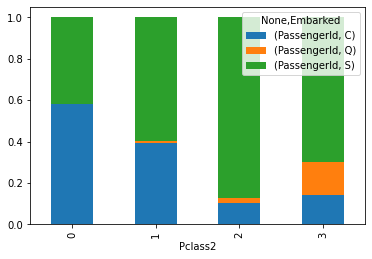

In [69]:
Pclass_emb_df_ratio.plot.bar(stacked=True)

### 정리
- 0등급 : 동반자가 많고 남성 비율이 다른 티켓 등급보다 낮다. 연령대가 약간 높다. Cherbourg에서 승선한 사람이 많다.
- 1등급 : 다른 등급에 비해 연령대가 가장 높다. 1인 승선률이 가장 높고 대가족 승선은 없다.
- 2등급 : 1등급과 3등급의 중간적인경향을 보인다. Southampton 에서 승선한 비율이 가장 높다.
- 3등급 : 1인부터 대가족까지 다양한 인원이 승선했다. 다른 클래스보다 Queenstown에서 승선한 비율이 높다.

In [70]:
C_young10 = all_df[(all_df["Embarked"] == "C") & (all_df["Age"] // 10 == 1) & (all_df["family_num"] == 0)]

In [71]:
C_young20 = all_df[(all_df["Embarked"] == "C") & (all_df["Age"] // 10 == 2) & (all_df["family_num"] == 0)]

In [72]:
len(C_young10)

7

In [73]:
len(C_young20)

31

<AxesSubplot:xlabel='Age', ylabel='Fare'>

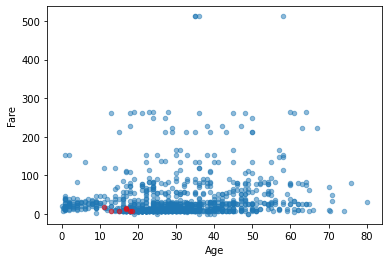

In [95]:
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young10.plot.scatter(x="Age", y="Fare", color="red", alpha=0.5, ax=ax)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

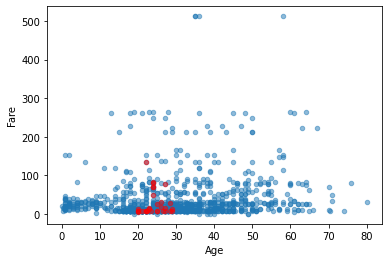

In [97]:
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young20.plot.scatter(x="Age", y="Fare", color="red", alpha=0.5, ax=ax)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

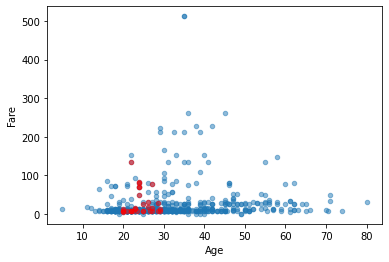

In [100]:
ax = all_df[all_df["family_num"]==0].plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young20.plot.scatter(x="Age", y="Fare", color="red", alpha=0.5, ax=ax)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

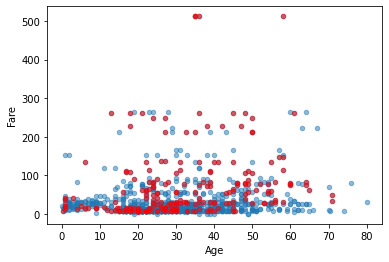

In [102]:
C_all = all_df[all_df["Embarked"] == "C"]
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
C_all.plot.scatter(x="Age", y="Fare", color="red", alpha=0.5, ax=ax)

In [104]:
all_df[(all_df["Age"] // 10 == 1) & (all_df["family_num"] == 0)][["Embarked","Fare"]].groupby("Embarked").mean()

,Fare
Embarked,
C,10.594057
Q,7.531944
S,16.218712
